In [1]:
import os, math, sys
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

path      = os.getcwd()
optpath   = path+'/optimization_data'



In [2]:
datadf = pd.read_csv("2021Dec_mononuc_inc-loop", index_col=0)
datadf['jfactor']=np.exp( -1*datadf.eopt )

In [3]:
datadf.head(5)

,ncpid,nuc_size,state,circ_size,loop_size,twist_cluster,eo,eopt,eopt_elastic,eopt_tilt,...,eopt_slide,eopt_rise,wr,tw,lk,eopt_bend,rel_eopt,rel_eopt_twist,rel_eopt_bend,jfactor
0,1aoi,141,lk31,336,195,3,11.912651,11.912651,11.9127,5.819155,...,0.003032,0.001450,-1.15670,32.1567,31,11.588848,0.350147,0.015955,0.816718,0.000007
1,1aoi,141,lk31,337,196,3,162.601601,11.458231,11.4582,5.676481,...,0.002697,0.001387,-1.21452,32.2145,31,11.295379,0.303243,0.006598,0.800118,0.000011
2,1aoi,141,lk31,338,197,3,313.290552,11.153850,11.1539,5.577295,...,0.002408,0.001358,-1.26798,32.2680,31,11.103866,0.266409,0.001576,0.790564,0.000014
3,1aoi,141,lk31,339,198,3,463.979502,11.009805,11.0098,5.518836,...,0.002176,0.001359,-1.31881,32.3188,31,11.003944,0.459882,0.000017,0.787427,0.000017
4,1aoi,141,lk31,340,199,3,614.668453,11.029953,11.0300,5.501039,...,0.002014,0.001391,-1.36872,32.3687,31,10.989854,0.516570,0.004658,0.790391,0.000016


### Energetic Data

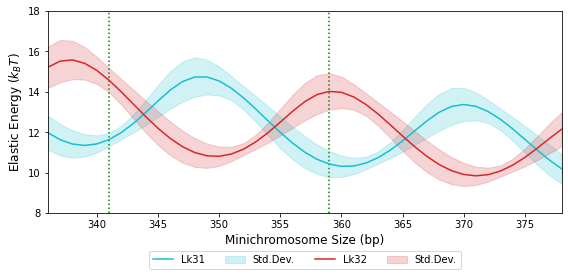

<Figure size 432x288 with 0 Axes>

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.lineplot(x=datadf.circ_size, 
             y=datadf.eopt, 
             hue=datadf.state, palette=['tab:cyan','tab:red'],
             ci="sd",
             ax=ax)

ax.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.3), labels=["Lk31",'Std.Dev.', "Lk32",'Std.Dev.'])
ax.set_xlim(336,378)
ax.set_ylim(8, 18)
ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
ax.set_ylabel("Elastic Energy ($k_{B}T$)", fontsize=12)

ax.axvline(x=341, color="green", linestyle=':', zorder=0)
ax.axvline(x=359, color="green", linestyle=':', zorder=0)

plt.tight_layout()

plt.savefig("ncms_vary-length_energy_01.png", dpi=300)

plt.show()
plt.clf()

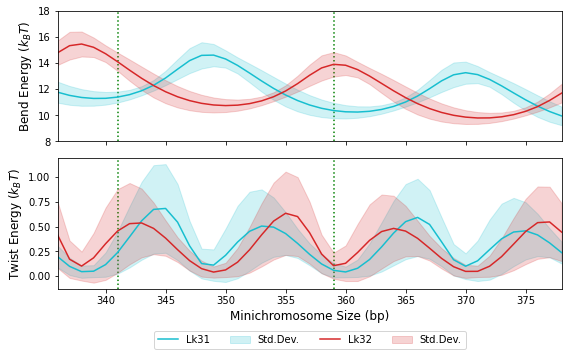

<Figure size 432x288 with 0 Axes>

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)


sns.lineplot(x=datadf.circ_size, 
             y=datadf.eopt_bend, 
             hue=datadf.state, palette=['tab:cyan','tab:red'],
             ci="sd", legend=False,
             ax=axes[0])

sns.lineplot(x=datadf.circ_size, 
             y=datadf.eopt_twist, 
             hue=datadf.state, palette=['tab:cyan','tab:red'],
             ci="sd", legend=False,
             ax=axes[1])

for ax in axes:
    ax.set_xlim( datadf.circ_size.min(), datadf.circ_size.max() )
    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)

axes[0].set_ylabel("Bend Energy ($k_{B}T$)", fontsize=12)
axes[1].set_ylabel("Twist Energy ($k_{B}T$)", fontsize=12)

axes[0].set_ylim(8, 18)
axes[1].legend(loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.5), labels=["Lk31",'Std.Dev.', "Lk32",'Std.Dev.'])


plt.tight_layout()
plt.savefig("ncms_vary-length_energy-bend-twist_01.png", dpi=300)

plt.show()
plt.clf()

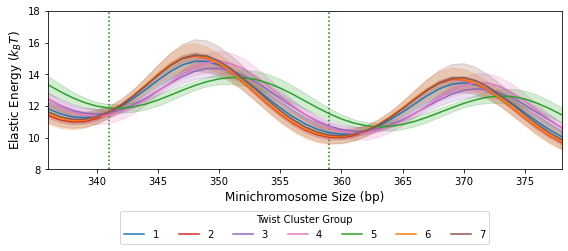

<Figure size 432x288 with 0 Axes>

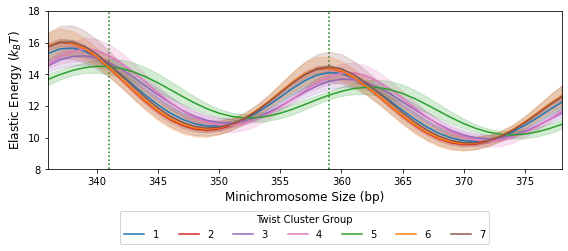

<Figure size 432x288 with 0 Axes>

In [45]:
for STATE in ["lk31", "lk32"]:

    fig, ax = plt.subplots(1, 1, figsize=(8,4), sharex=True)
    
    testdf = datadf.copy().loc[(datadf.state==STATE)].reset_index(drop=True)
    
    PLT = sns.lineplot(x=testdf.circ_size, 
                 y=testdf.eopt, 
                 hue=testdf.twist_cluster,
                 palette=['tab:blue','tab:red','tab:purple','tab:pink','tab:green','tab:orange','tab:brown'],
                 ci="sd",
                 ax=ax)
    
    sns.move_legend(PLT, title="Twist Cluster Group", loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.5))
    ax.set_xlim(336,378)
    ax.set_ylim(8, 18)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
    ax.set_ylabel("Elastic Energy ($k_{B}T$)", fontsize=12)

    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)
    
    del testdf

    plt.tight_layout()
    plt.show()
    plt.clf()
    

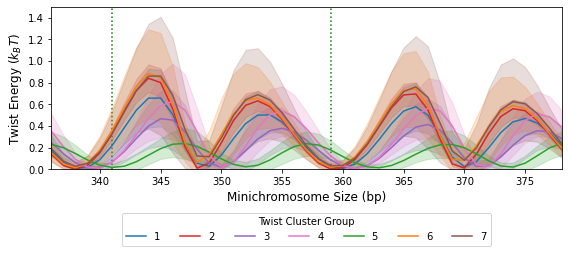

<Figure size 432x288 with 0 Axes>

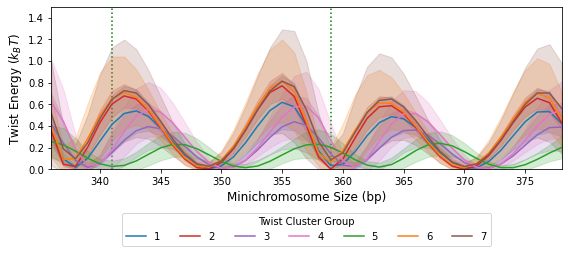

<Figure size 432x288 with 0 Axes>

In [50]:
for STATE in ["lk31", "lk32"]:

    fig, ax = plt.subplots(1, 1, figsize=(8,4), sharex=True)
    
    testdf = datadf.copy().loc[(datadf.state==STATE)].reset_index(drop=True)
    
    PLT = sns.lineplot(x=testdf.circ_size, 
                 y=testdf.eopt_twist, 
                 hue=testdf.twist_cluster,
                 palette=['tab:blue','tab:red','tab:purple','tab:pink','tab:green','tab:orange','tab:brown'],
                 ci="sd",
                 ax=ax)
    
    sns.move_legend(PLT, title="Twist Cluster Group", loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.5))
    ax.set_xlim(336,378)
    ax.set_ylim(0,1.5)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
    ax.set_ylabel("Twist Energy ($k_{B}T$)", fontsize=12)

    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)
    
    del testdf

    plt.tight_layout()
    plt.show()
    plt.clf()

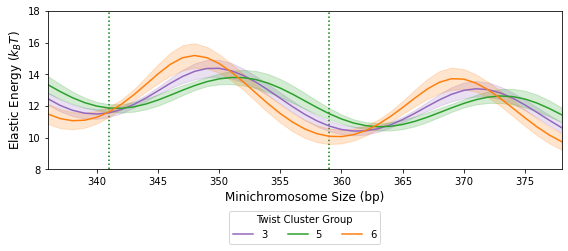

<Figure size 432x288 with 0 Axes>

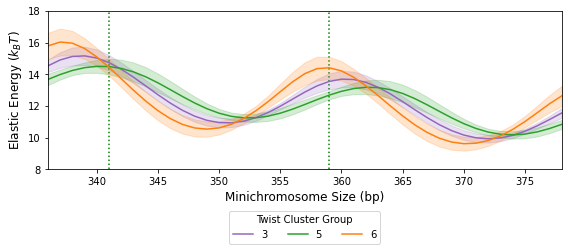

<Figure size 432x288 with 0 Axes>

In [69]:
for STATE in ["lk31", "lk32"]:
    
    CLUSTERS = [3, 5, 6]
    
    fig, ax= plt.subplots(1, 1, figsize=(8,4), sharex=True)
    
    testdf = datadf.copy().loc[(datadf.state==STATE)
                              &(datadf.twist_cluster.isin(CLUSTERS))].reset_index(drop=True)
    
    PLT=sns.lineplot(x=testdf.circ_size, 
                 y=testdf.eopt, 
                 hue=testdf.twist_cluster, palette=['tab:purple','tab:green','tab:orange'],
                 ci="sd",
                 ax=ax)
    
    sns.move_legend(PLT, title="Twist Cluster Group", loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.5))
    ax.set_xlim(336,378)
    ax.set_ylim(8, 18)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
    ax.set_ylabel("Elastic Energy ($k_{B}T$)", fontsize=12)

    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)
    
    del testdf, CLUSTERS

    plt.tight_layout()
    plt.savefig("ncms_vary-length_"+STATE+"_energy_clusters-3-5-6_01.png", dpi=300)
    plt.show()
    plt.clf()


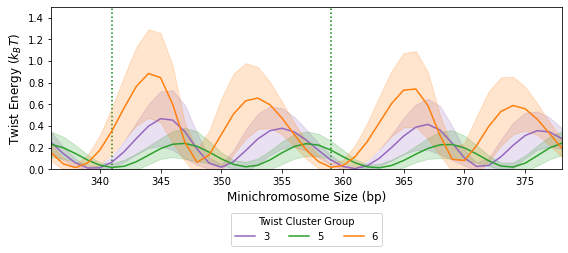

<Figure size 432x288 with 0 Axes>

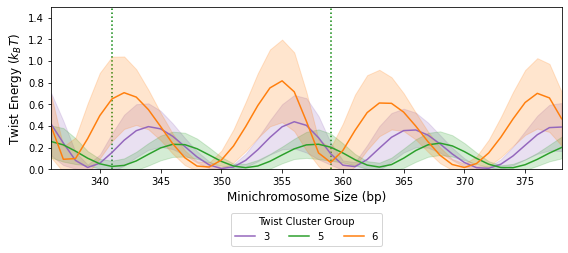

<Figure size 432x288 with 0 Axes>

In [71]:
for STATE in ["lk31", "lk32"]:
    
    CLUSTERS = [3, 5, 6]
    
    fig, ax= plt.subplots(1, 1, figsize=(8,4), sharex=True)
    
    testdf = datadf.copy().loc[(datadf.state==STATE)
                              &(datadf.twist_cluster.isin(CLUSTERS))].reset_index(drop=True)
    
    PLT=sns.lineplot(x=testdf.circ_size, 
                 y=testdf.eopt_twist, 
                 hue=testdf.twist_cluster, palette=['tab:purple','tab:green','tab:orange'],
                 ci="sd",
                 ax=ax)
    
    sns.move_legend(PLT, title="Twist Cluster Group", loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.5))
    ax.set_xlim(336,378)
    ax.set_ylim(0, 1.5)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
    ax.set_ylabel("Twist Energy ($k_{B}T$)", fontsize=12)

    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)
    
    del testdf, CLUSTERS

    plt.tight_layout()
    plt.savefig("ncms_vary-length_"+STATE+"_energy-twist_clusters-3-5-6_01.png", dpi=300)
    plt.show()
    plt.clf()


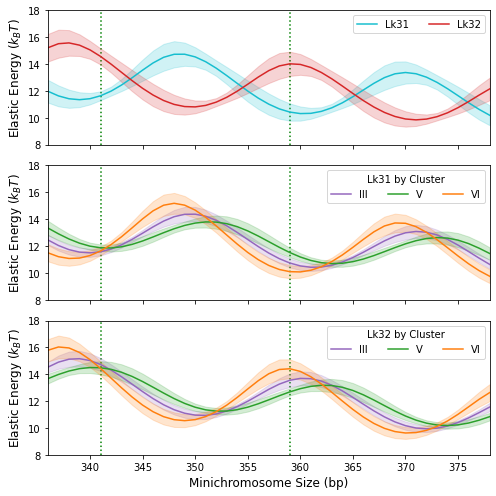

<Figure size 432x288 with 0 Axes>

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(7,7), sharex=True)
CLUSTERS = [3, 5, 6]

testdf = datadf.copy()
testdf.state=testdf.state.str.replace("lk","Lk")
sns.lineplot(x=testdf.circ_size, 
             y=testdf.eopt, 
             hue=testdf.state, palette=['tab:cyan','tab:red'],
             ci="sd",
             ax=axes[0])
axes[0].legend(loc=0, ncol=2)#, labels=["Lk31",'Std.Dev.', "Lk32",'Std.Dev.'])
del testdf


testdf = datadf.copy().loc[(datadf.state=="lk31")&(datadf.twist_cluster.isin(CLUSTERS))].reset_index(drop=True)
testdf.twist_cluster = testdf.twist_cluster.replace({3:'III',5:'V',6:'VI'})
PLT1=sns.lineplot(x=testdf.circ_size, y=testdf.eopt, 
             hue=testdf.twist_cluster, palette=['tab:purple','tab:green','tab:orange'],
             ci="sd",
             ax=axes[1])
sns.move_legend(PLT1, title="Lk31 by Cluster", loc="best", ncol=3)
del testdf, PLT1

testdf = datadf.copy().loc[(datadf.state=="lk32")&(datadf.twist_cluster.isin(CLUSTERS))].reset_index(drop=True)
testdf.twist_cluster = testdf.twist_cluster.replace({3:'III',5:'V',6:'VI'})
PLT2=sns.lineplot(x=testdf.circ_size, y=testdf.eopt, 
             hue=testdf.twist_cluster, palette=['tab:purple','tab:green','tab:orange'],
             ci="sd",
             ax=axes[2])
sns.move_legend(PLT2, title="Lk32 by Cluster", loc="best", ncol=3)
del testdf, PLT2

for ax in axes:
    ax.set_xlim(336,378)
    ax.set_ylim(8, 18)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
    ax.set_ylabel("Elastic Energy ($k_{B}T$)", fontsize=12)
    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)

del CLUSTERS

plt.tight_layout()

plt.savefig("ncms_vary-length_energy-all_01.png", dpi=300)

plt.show()
plt.clf()


### Relative Energetics Data

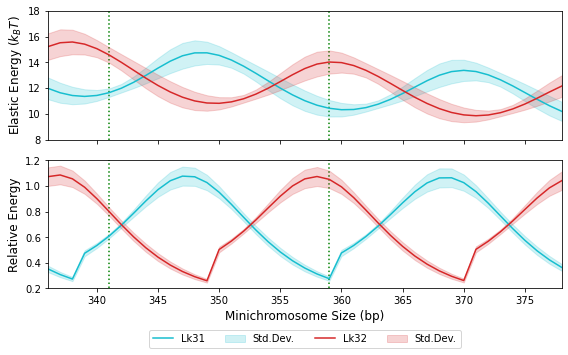

<Figure size 432x288 with 0 Axes>

In [59]:
for x in ["eopt"]:

    fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
    
    sns.lineplot(x=datadf.circ_size, 
                 y=datadf[x],
                 hue=datadf.state, palette=['tab:cyan','tab:red'],
                 ci="sd", legend=False,
                 ax=axes[0])
    
    sns.lineplot(x=datadf.circ_size, 
                 y=datadf["rel_"+x],
                 hue=datadf.state, palette=['tab:cyan','tab:red'],
                 ci="sd", legend=False,
                 ax=axes[1])
    
    for ax in axes:
        ax.set_xlim( datadf.circ_size.min(), datadf.circ_size.max() )
        ax.axvline(x=341, color="green", linestyle=':', zorder=0)
        ax.axvline(x=359, color="green", linestyle=':', zorder=0)
        ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)

    axes[0].set_ylabel("Elastic Energy ($k_{B}T$)", fontsize=12)
    axes[1].set_ylabel("Relative Energy", fontsize=12)

    axes[0].set_ylim(8, 18)
    axes[1].legend(loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.5), labels=["Lk31",'Std.Dev.', "Lk32",'Std.Dev.'])
    
    plt.tight_layout()
    plt.show()
    plt.clf()


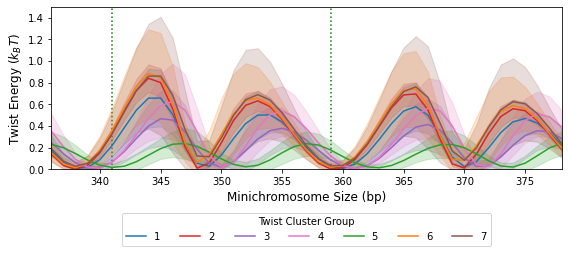

<Figure size 432x288 with 0 Axes>

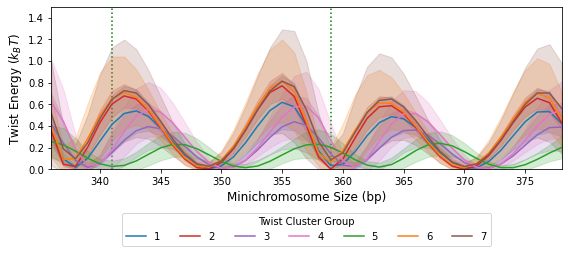

<Figure size 432x288 with 0 Axes>

In [60]:
for STATE in ["lk31", "lk32"]:
    
    testdf = datadf.copy().loc[(datadf.state==STATE)].reset_index(drop=True)
    for x in ["eopt"]:
        fig, ax = plt.subplots(1, 1, figsize=(8,4), sharex=True)
        PLT = sns.lineplot(x=testdf.circ_size, 
                 y=testdf.eopt_twist, 
                 hue=testdf.twist_cluster,
                 palette=['tab:blue','tab:red','tab:purple','tab:pink','tab:green','tab:orange','tab:brown'],
                 ci="sd",
                 ax=ax)
    
        sns.move_legend(PLT, title="Twist Cluster Group", loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.5))
        ax.set_xlim(336,378)
        ax.set_ylim(0,1.5)
        ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
        ax.set_ylabel("Twist Energy ($k_{B}T$)", fontsize=12)

        ax.axvline(x=341, color="green", linestyle=':', zorder=0)
        ax.axvline(x=359, color="green", linestyle=':', zorder=0)
        
        plt.tight_layout()
        plt.show()
        plt.clf()
    del testdf



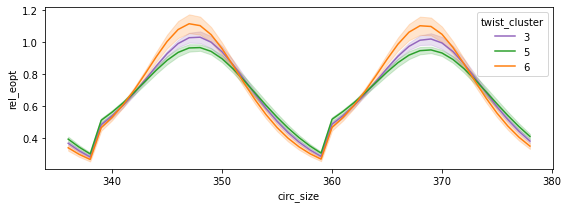

<Figure size 432x288 with 0 Axes>

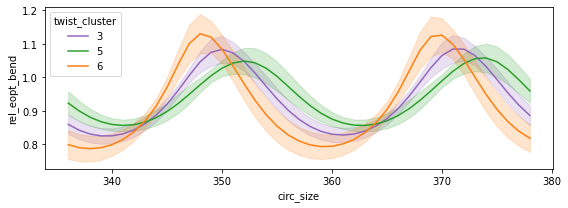

<Figure size 432x288 with 0 Axes>

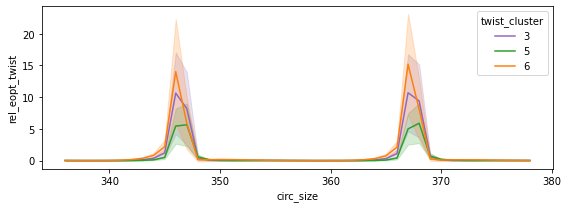

<Figure size 432x288 with 0 Axes>

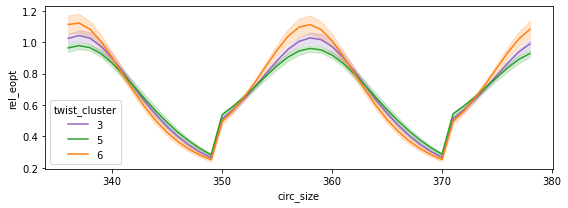

<Figure size 432x288 with 0 Axes>

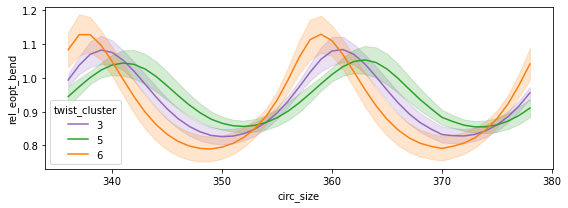

<Figure size 432x288 with 0 Axes>

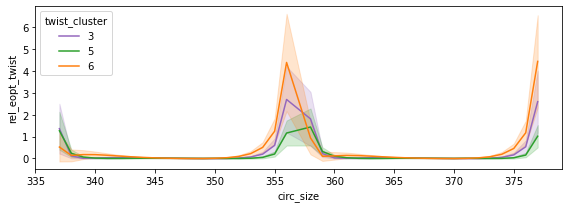

<Figure size 432x288 with 0 Axes>

In [62]:
for STATE in ["lk31", "lk32"]:
    
    testdf = datadf.copy().loc[(datadf.state==STATE)].reset_index(drop=True)
    CLUSTERS = [3, 5, 6]
    testdf = testdf.loc[testdf.twist_cluster.isin(CLUSTERS)].reset_index(drop=True)
    for x in ["eopt", "eopt_bend", "eopt_twist"]:
        
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        
        sns.lineplot(x=testdf.circ_size, 
                     y=testdf["rel_"+x],
                     hue=testdf.twist_cluster, palette=['tab:purple','tab:green','tab:orange'],
                     ci="sd",ax=ax)


        plt.tight_layout()
        plt.show()
        plt.clf()
    del testdf, CLUSTERS



### Topological Data

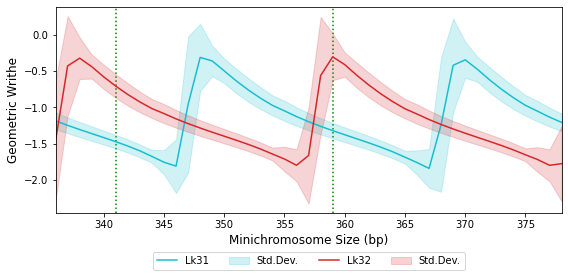

<Figure size 432x288 with 0 Axes>

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.lineplot(x=datadf.circ_size, 
             y=datadf.wr, 
             hue=datadf.state, palette=['tab:cyan','tab:red'],
             ci="sd",
             ax=ax)

ax.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.3), labels=["Lk31",'Std.Dev.', "Lk32",'Std.Dev.'])
ax.set_xlim(336,378)
#ax.set_ylim(8, 18)
ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
ax.set_ylabel("Geometric Writhe", fontsize=12)

ax.axvline(x=341, color="green", linestyle=':', zorder=0)
ax.axvline(x=359, color="green", linestyle=':', zorder=0)

plt.tight_layout()
plt.savefig("ncms_topo-wr_01.png", dpi=300)
plt.show()
plt.clf()

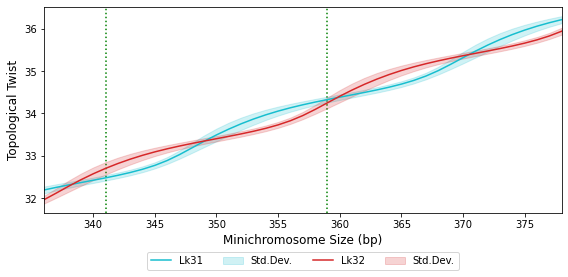

<Figure size 432x288 with 0 Axes>

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.lineplot(x=datadf.circ_size, 
             y=datadf.tw, 
             hue=datadf.state, palette=['tab:cyan','tab:red'],
             ci="sd",
             ax=ax)

ax.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.3), labels=["Lk31",'Std.Dev.', "Lk32",'Std.Dev.'])
ax.set_xlim(336,378)
#ax.set_ylim(8, 18)
ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
ax.set_ylabel("Topological Twist", fontsize=12)

ax.axvline(x=341, color="green", linestyle=':', zorder=0)
ax.axvline(x=359, color="green", linestyle=':', zorder=0)

plt.tight_layout()
plt.savefig("ncms_topo-tw_01.png", dpi=300)
plt.show()
plt.clf()

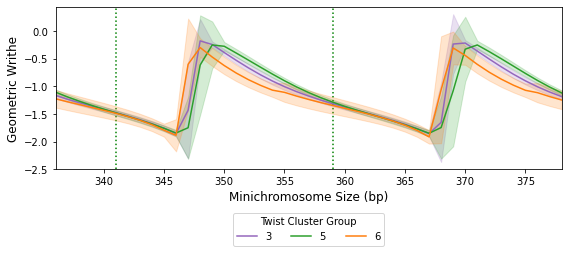

<Figure size 432x288 with 0 Axes>

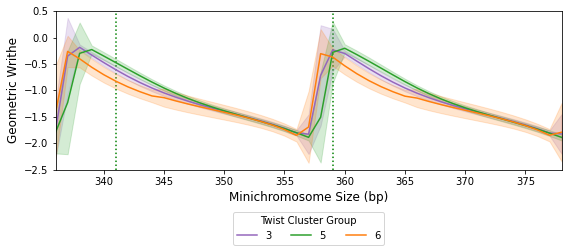

<Figure size 432x288 with 0 Axes>

In [77]:
for STATE in ["lk31", "lk32"]:
    
    CLUSTERS = [3, 5, 6]
    
    fig, ax= plt.subplots(1, 1, figsize=(8,4), sharex=True)
    
    testdf = datadf.copy().loc[(datadf.state==STATE)
                              &(datadf.twist_cluster.isin(CLUSTERS))].reset_index(drop=True)
    
    PLT=sns.lineplot(x=testdf.circ_size, 
                 y=testdf.wr, 
                 hue=testdf.twist_cluster, palette=['tab:purple','tab:green','tab:orange'],
                 ci="sd",
                 ax=ax)
    
    sns.move_legend(PLT, title="Twist Cluster Group", loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.5))
    ax.set_xlim(336,378)
    #ax.set_ylim(0, 1.5)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
    ax.set_ylabel("Geometric Writhe", fontsize=12)

    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)
    
    del testdf, CLUSTERS

    plt.tight_layout()
    plt.savefig("ncms_vary-length_"+STATE+"_topo-wr_clusters-3-5-6_01.png", dpi=300)
    plt.show()
    plt.clf()

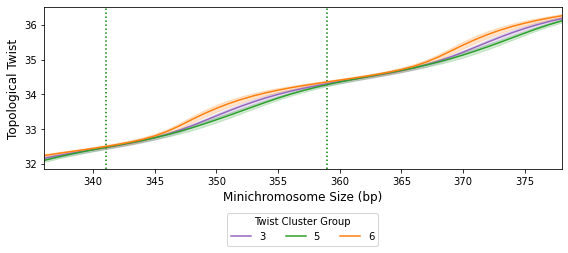

<Figure size 432x288 with 0 Axes>

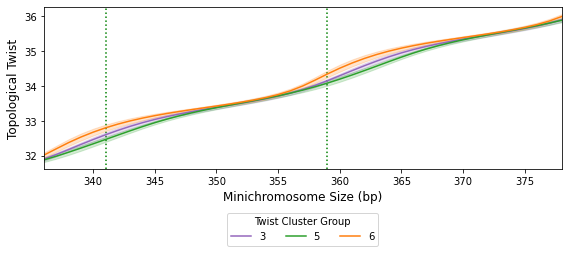

<Figure size 432x288 with 0 Axes>

In [76]:
for STATE in ["lk31", "lk32"]:
    
    CLUSTERS = [3, 5, 6]
    
    fig, ax= plt.subplots(1, 1, figsize=(8,4), sharex=True)
    
    testdf = datadf.copy().loc[(datadf.state==STATE)
                              &(datadf.twist_cluster.isin(CLUSTERS))].reset_index(drop=True)
    
    PLT=sns.lineplot(x=testdf.circ_size, 
                 y=testdf.tw, 
                 hue=testdf.twist_cluster, palette=['tab:purple','tab:green','tab:orange'],
                 ci="sd",
                 ax=ax)
    
    sns.move_legend(PLT, title="Twist Cluster Group", loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.5))
    ax.set_xlim(336,378)
    #ax.set_ylim(0, 1.5)
    ax.set_xlabel("Minichromosome Size (bp)", fontsize=12)
    ax.set_ylabel("Topological Twist", fontsize=12)

    ax.axvline(x=341, color="green", linestyle=':', zorder=0)
    ax.axvline(x=359, color="green", linestyle=':', zorder=0)
    
    del testdf, CLUSTERS

    plt.tight_layout()
    plt.savefig("ncms_vary-length_"+STATE+"_topo-tw_clusters-3-5-6_01.png", dpi=300)
    plt.show()
    plt.clf()

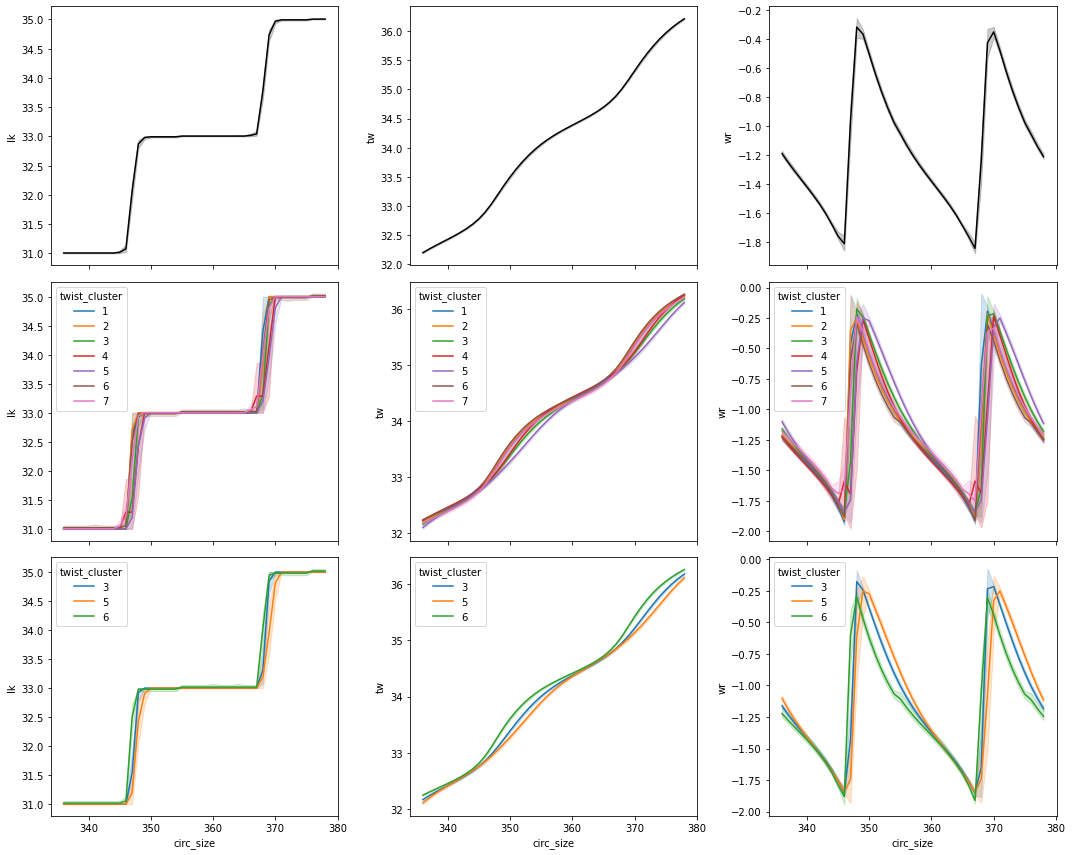

<Figure size 432x288 with 0 Axes>

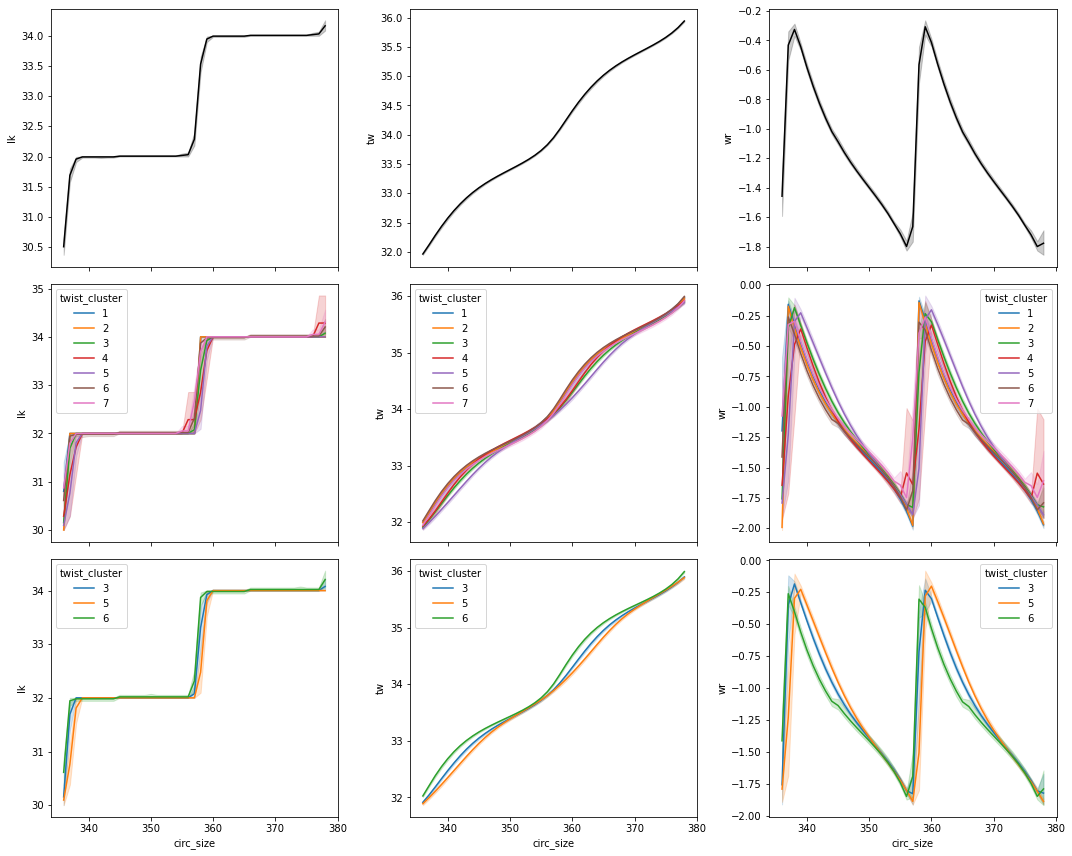

<Figure size 432x288 with 0 Axes>

In [5]:
for STATE in ["lk31", "lk32"]:
    CLUSTERS = [3, 5, 6]

    fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True)
    
    testdf = datadf.copy().loc[(datadf.state==STATE)].reset_index(drop=True)
    sns.lineplot(x=testdf.circ_size, y=testdf.lk, color="black", ax=axes[0,0])
    sns.lineplot(x=testdf.circ_size, y=testdf.tw, color="black", ax=axes[0,1])
    sns.lineplot(x=testdf.circ_size, y=testdf.wr, color="black", ax=axes[0,2])
    
    sns.lineplot(x=testdf.circ_size, y=testdf.lk, hue=testdf.twist_cluster, palette="tab10", ax=axes[1,0])
    sns.lineplot(x=testdf.circ_size, y=testdf.tw, hue=testdf.twist_cluster, palette="tab10", ax=axes[1,1])
    sns.lineplot(x=testdf.circ_size, y=testdf.wr, hue=testdf.twist_cluster, palette="tab10", ax=axes[1,2])    
    
    testdf = testdf.loc[testdf.twist_cluster.isin(CLUSTERS)].reset_index(drop=True)
    sns.lineplot(x=testdf.circ_size, y=testdf.lk, hue=testdf.twist_cluster, palette="tab10", ax=axes[2,0])
    sns.lineplot(x=testdf.circ_size, y=testdf.tw, hue=testdf.twist_cluster, palette="tab10", ax=axes[2,1])
    sns.lineplot(x=testdf.circ_size, y=testdf.wr, hue=testdf.twist_cluster, palette="tab10", ax=axes[2,2])
    del testdf

    plt.tight_layout()
    plt.show()
    plt.clf()
    
    del CLUSTERS


### Scratch